# Assignment 2

## Part 1: Image Processing Basics

Computers use tiny dots called _pixels_ to display images. Each pixel is stored as an array of numbers that represent color intensities.

__Example.__ In an 8-bit grayscale image, each pixel is a single number. The number represents light intensity ranging from black (0) to white (255).

__Example.__ In a 24-bit RGB color image, each pixel is an array of 3 numbers. These numbers range from 0 to 255 and represent red, green, and blue intensity, respectively. For instance, `(0, 0, 255)` is <span style="color:#00F">bright blue</span> and `(255, 128, 0)` is <span style="color:#FF8000">orange</span>.

In this assignment, you'll use Python and NumPy to manipulate 24-bit RGB color images.

You can use `Image.open()` from the Python imaging library (PIL) to open an image:

In [2]:
from PIL import Image
# Cat image from https://unsplash.com/photos/FqkBXo2Nkq0
cat_img = Image.open("/Users/KathrynChiang/Downloads/STA141B/HW2 & lab3/cat.png")

Images display inline in Jupyter notebooks:

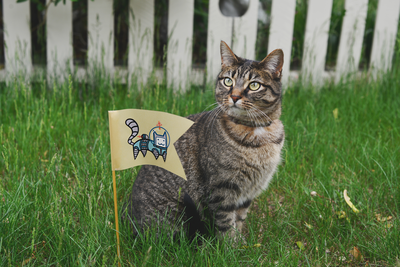

In [3]:
cat_img

In a Python terminal, you can display the image in a new window with `.show()` instead.

NumPy can convert images to arrays:

In [4]:
import numpy as np
cat = np.array(cat_img)

(267, 400, 3)


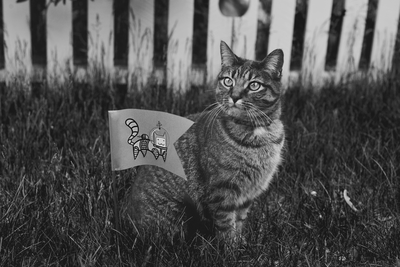

In [5]:
### lab

print cat.shape ## red(267*400); G(267*400); B(267*400)
cat[:,:,2].shape
Image.fromarray(np.uint8(cat[:,:,2])) # change the last num with 0R,1G,2B 

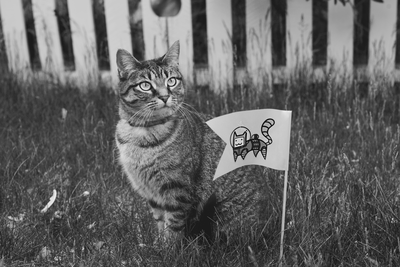

In [6]:
# After reloading the dog array.
flip_cat = np.fliplr(cat[:,:,0])
Image.fromarray(np.uint8(flip_cat))

To convert an array back to an image (for display) use the function below:

In [7]:
def as_image(x):
    """Convert an ndarray to an Image.
    
    Args:
        x (ndarray): The array of pixels.
        
    Returns:
        Image: The Image object.
    """
    return Image.fromarray(np.uint8(x))

__Exercise 1.1.__ How many dimensions does the `cat` array have? What does each dimension represent?

In [8]:
print "There are %d dimensions the cat array has." % cat.ndim
print "Each dimension represents represently by rows, columns, number of colors (RGB)."

There are 3 dimensions the cat array has.
Each dimension represents represently by rows, columns, number of colors (RGB).


__Exercise 1.2.__ Use `.copy()` to copy the cat array to a new variable. Swap the green and blue color channels in the copy. Display the result.

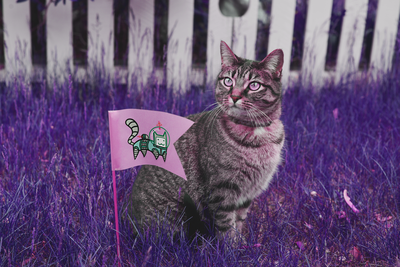

In [9]:
catCopy = cat.copy()
for i in range(267):
    for j in range(400):
        temp = catCopy[i][j][2]
        catCopy[i][j][2] = catCopy[i][j][1]
        catCopy[i][j][1] = temp
as_image(catCopy)

__Exercise 1.3.__ Why is `.copy()` necessary in exercise 1.2? What happens if you don't use `.copy()`?

In [10]:
print "without using the copy function, the original image will be changed and we will lost the original image."

without using the copy function, the original image will be changed and we will lost the original image.


__Exercise 1.4.__ Flip the blue color channel from left to right. Display the resulting image. _Hint: see the NumPy documentation on array manipulation routines._

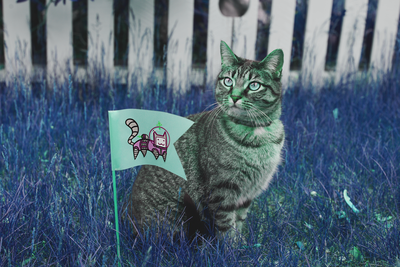

In [11]:
catCopy = cat.copy()
Image.fromarray(np.roll(catCopy, 1, axis=-1))

## Part 2: Singular Value Decomposition

Suppose $X$ is an $n \times p$ matrix (for instance, one color channel of the cat image). The _singular value decomposition_ (SVD) factors $X$ as $X = UD V^T$, where:

* $U$ is an $n \times n$ orthogonal matrix
* $D$ is an $n \times p$ matrix with zeroes everywhere except the diagonal
* $V$ is an $p \times p$ orthogonal matrix

Note that a matrix $A$ is _orthogonal_ when $A^T A = I$ and $AA^T = I$.

__Example.__ We can use NumPy to compute the SVD for a matrix:

In [12]:
x = np.array(
    [[0, 2, 3],
     [3, 2, 1]]
)
u, d, vt = np.linalg.svd(x)
# Here d is 2x2 because NumPy only returns the diagonal of D.
print "u is:\n", u, "\nd is:\n", d, "\nv^T is:\n", vt

u is:
[[-0.68145174 -0.73186305]
 [-0.73186305  0.68145174]] 
d is:
[ 4.52966162  2.54600974] 
v^T is:
[[-0.48471372 -0.62402665 -0.6128975 ]
 [ 0.80296442 -0.03960025 -0.59470998]
 [ 0.34684399 -0.78039897  0.52026598]]


If we let

* $u_i$ denote the $i$th column of $U$
* $d_i$ denote the $i$th diagonal element of $D$
* $v_i$ denote the $i$th column of $V$

then we can write the SVD as $\ X = UDV^T = d_1 u_1 v_1^T + \ldots + d_m u_m v_m^T\ $ using the rules of matrix multiplication. In other words, the SVD decomposes $X$ into a sum!

If we eliminate some of the terms in the sum, we get a simple approximation for $X$. For instance, we could eliminate all but first 3 terms to get the approximation $X \approx d_1 u_1 v_1^T + d_2 u_2 v_2^T + d_3 u_3 v_3^T$. This is the same as if we:

* Zero all but the first 3 diagonal elements of $D$ to get $D_3$, then compute $X \approx UD_3V^T$
* Eliminate all but the first 3 columns of $V$ to get $p \times 3$ matrix $V_3$, then compute $X \approx UDV_3^T$

We always eliminate terms starting from the end rather than the beginning, because these terms contribute the least to $X$.

Why would we want to approximate a matrix $X$?

In statistics, _principal components analysis_ uses this approximation to reduce the dimension (number of covariates) in a  centered (mean 0) data set. The vectors $d_i u_i$ are called the _principal components_ of $X$. The vectors $v_i^T$ are called the _basis vectors_. Note that both depend on $X$. The dimension is reduced by using the first $q$ principal components instead of the original $p$ covariates. In other words, the $n \times p$ data $X$ is replaced by the $n \times q$ data $UD_q = XV_q$

In computing, this approximation is sometimes used to reduce the number of bits needed to store a matrix (or image). If $q$ terms are kept, then only $nq + pq$ values (for $XV_q$ and $V_q^T$) need to be stored instead of the uncompressed $np$ values.

__Exercise 2.1.__ Write the functions described below.

* A function that takes a matrix $X$ and returns its principal component matrix $XV_q$ and basis matrix $V_q^T$. This function should also take the number of terms kept $q$ as an argument.

* A function that takes a principal component matrix $XV_q$ and basis matrix $V_q^T$ and returns an approximation $\hat{X}$ for the original matrix.

As usual, make sure to document your functions. Test your function on the red color channel of the cat image. What's the smallest number of terms where the cat is still recognizable as a cat?

takes a matrix  X  and returns its principal component matrix  XVq  and basis matrix  Vq
    
    Arguments: X numpy array of dimension n*p
    
    Returns: XVq numpy array of dimension nq Vq numpy array of dimension q
    
The smallest number of terms where the cat is still recognizable as a cat is approximately 5 terms.


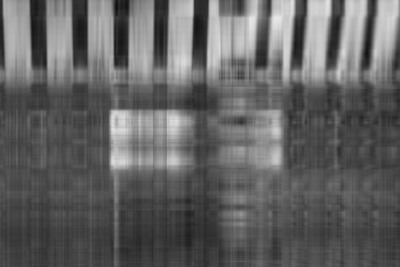

In [13]:
# worked with: Natalie Marcom, Yong Lin Jing
cat = np.array(cat_img)
def pca(x,q):
    """takes a matrix  X  and returns its principal component matrix  XVq  and basis matrix  Vq
    
    Arguments: X numpy array of dimension n*p
    
    Returns: XVq numpy array of dimension nq Vq numpy array of dimension q
    """
    u, d, vt = np.linalg.svd(x)
    n= x.shape[0]
    Vq = vt[:q,:] 
    D = np.zeros((n,q),int)
    D[:q,:q] = np.diag(d[0:q])
    Xvq = np.dot(u,D)
    return Xvq,Vq

def approX(Xvq, Vq):
    """takes Xvq and Vq and returns the approximation of X_hat
    """    
    return np.dot(Xvq, Vq)

x = np.array(cat[:,:,0])
q = 5
red = pca(x,q)

print "The smallest number of terms where the cat is still recognizable as a cat is approximately 5 terms."
as_image(approX(red[0],red[1])) #Image with the terms is set to 5.

__Exercise 2.2.__ You can check the number of bytes used by a NumPy array with the `.nbytes` attribute. How many bytes does the red color channel of the cat image use? How many bytes does the compressed version use when 10 terms are kept? What percentage of the original size is this?

In [14]:
from __future__ import division
q = 10
compressed = pca(x,q)
print "Bytes for the red color channel of the cat image is %d" % (x.nbytes)
print "When 10 terms are kept, the number of bytes for Xvq = %d, and for Vq = %d" % (compressed[0].nbytes, compressed[1].nbytes)
print "%f percent" % ((compressed[0].nbytes + compressed[1].nbytes)/ x.nbytes*100)

Bytes for the red color channel of the cat image is 106800
When 10 terms are kept, the number of bytes for Xvq = 21360, and for Vq = 32000
49.962547 percent
